In [ ]:
!pip install keras
!pip install numpy opencv-python pillow tensorflow keras imutils scikit-learn matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam 



In [ ]:
#Take a look at a iceberg
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

#Ignore warnings
import warnings 

warnings.filterwarnings('ignore')

py.init_notebook_mode(connected=True) 

In [ ]:
train = pd.read_json('/content/drive/MyDrive/train.json')
test = pd.read_json('/content/drive/MyDrive/test.json')

In [ ]:
train.head()

,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0


In [ ]:
train['inc_angle'].value_counts()

na         133
34.4721     23
42.5591     16
36.1061     15
33.6352     15
          ... 
44.0359      1
45.1289      1
43.9369      1
39.6857      1
37.9814      1
Name: inc_angle, Length: 879, dtype: int64

In [ ]:
train.inc_angle = train.inc_angle.replace('na',0)

In [ ]:
len(train.loc[0,'band_1'])

5625

In [ ]:
#Generate the training data
#Create 3 bands having HH, HV and avg of both
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
#np.concatenate
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], X_band_2[:, :, :, np.newaxis],((X_band_1+X_band_2)/2)[:, :, :, np.newaxis]], axis=-1)

X_band_test_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_1"]])
X_band_test_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_2"]])
X_test = np.concatenate([X_band_test_1[:, :, :, np.newaxis]
                          , X_band_test_2[:, :, :, np.newaxis]
                         , ((X_band_test_1+X_band_test_2)/2)[:, :, :, np.newaxis]], axis=-1)

In [ ]:
train.loc[14, 'is_iceberg']

0

In [ ]:

band1 = X_band_1[14,:,:]
band2 = X_band_2[14,:,:]
#from plotly import tools
fig = tools.make_subplots(rows=1,cols=2, specs=[[{'is_3d': True}, {'is_3d':True}]])
data = go.Surface(z = band1, colorscale='RdBu_r', scene='scene1', showscale=True)
data1 = go.Surface(z = band2, colorscale='RdBu_r', scene='scene1', showscale=True)

fig['layout'].update(title='3D surface plot for "{}" ', titlefont=dict(size=30), height=800, width=1200)


fig.append_trace(data,1,1)
fig.append_trace(data1,1,2)
py.iplot(fig)

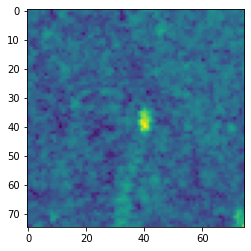

In [ ]:
plt.imshow(band1)
plt.show()

In [ ]:
label = 'ship'

fig = tools.make_subplots(rows=1, cols=2,  specs=[[{'is_3d': True}, {'is_3d': True}]])
fig.append_trace(dict(type='surface', z=band1, colorscale='RdBu_r',
                          scene='scene1', showscale=False), 1, 1)
fig.append_trace(dict(type='surface', z=band2, colorscale='RdBu_r',
                          scene='scene2', showscale=False), 1, 2)


fig['layout'].update(title='3D surface plot for "{}" (left is from band1, right is from band2)'.format(label), titlefont=dict(size=30), height=800, width=1200)

py.iplot(fig)

In [ ]:
def plot_contour_2d(band1, band2, label):
    fig = tools.make_subplots(rows=1, cols=2, specs=[[{'is_3d': True}, {'is_3d':True}]])
    fig.append_trace(dict(type='surface', z=band1, colorscale='RdBu_r',
                          scene='scene1', showscale=False), 1, 1)
    fig.append_trace(dict(type='surface', z=band2, colorscale='RdBu_r',
                          scene='scene2', showscale=False), 1, 2)
    
    fig['layout'].update(title='3D surface plot for "{}" (left is from band1, right is from band2)'.format(label), titlefont=dict(size=30), height=800, width=1200)

    py.iplot(fig)
    

    fig, ax = plt.subplots(1,2,figsize=(16,10))
    ax[0].imshow(X_band_1[num,:,:])
    ax[0].set_title('Image from band_1', fontsize=15)
    ax[1].imshow(X_band_2[num,:,:])
    ax[1].set_title('Image from band_2', fontsize=15)
    plt.show()

    

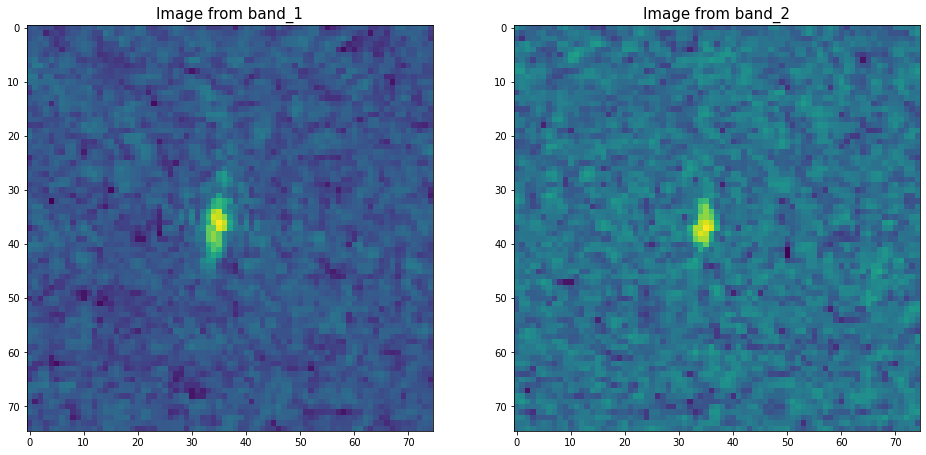

In [ ]:
num = 0
label = 'iceberg' if (train['is_iceberg'].values[num] == 1) else'ship'
plot_contour_2d(X_band_1[num,:,:], X_band_2[num,:,:], label)

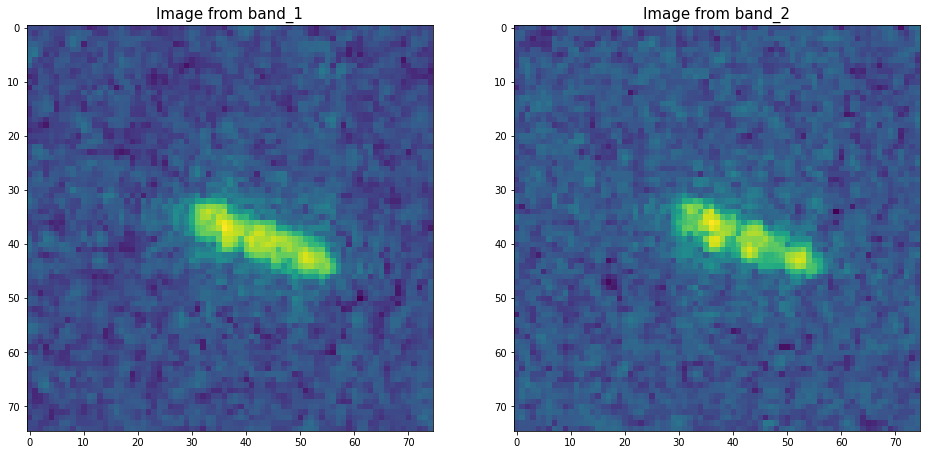

In [ ]:
num = 100
label = 'iceberg' if (train['is_iceberg'].values[num] == 1) else'ship'
plot_contour_2d(X_band_1[num,:,:], X_band_2[num,:,:], label)

In [ ]:
#Import Keras.
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import initializers
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

In [ ]:
#define our model
def getModel():
    #Building the model
    gmodel=Sequential()
    #Conv Layer 1
    gmodel.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)))
    gmodel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 2
    gmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 3
    gmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 4
    gmodel.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Flatten the data for upcoming dense layers
    gmodel.add(Flatten())

    #Dense Layers
    gmodel.add(Dense(512))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    #Dense Layer 2
    gmodel.add(Dense(256))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    #Sigmoid Layer
    #Adam 
    gmodel.add(Dense(1))
    gmodel.add(Activation('sigmoid'))

    mypotim=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    gmodel.compile(loss='binary_crossentropy',
                  optimizer=mypotim,
                  metrics=['accuracy'])
    gmodel.summary()
    return gmodel


def get_callbacks(filepath, patience=2):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]
file_path = ".model_weights.hdf5"
callbacks = get_callbacks(filepath=file_path, patience=5)

In [ ]:
target_train = train['is_iceberg']
X_train, X_valid, y_train, y_valid = train_test_split(X_train, target_train, random_state=1, train_size = 0.8)

In [ ]:
#Without denoising, core features.
gmodel=getModel()
gmodel.fit(X_train, y_train,
          batch_size=24,
          epochs=50,
          verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 17, 17, 128)       0

In [ ]:
gmodel.load_weights(filepath=file_path)
score = gmodel.evaluate(X_valid, y_valid, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11/11 [==============================] - 2s 165ms/step - loss: 0.2652 - accuracy: 0.9003
Test loss: 0.265164852142334
Test accuracy: 0.9003115296363831


In [ ]:
#predicted_test = gmodel.predict_proba(X_test)
predict_x=gmodel.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)


In [ ]:
submission = pd.DataFrame()
submission['id']=test['id']
submission['is_iceberg']=predict_x.reshape((predict_x.shape[0]))
submission.to_csv('sub.csv', index=False)                                   

In [ ]:
dfsub=pd.read_csv('/content/sub.csv')
dfsub

,id,is_iceberg
0,5941774d,1.551627e-01
1,4023181e,9.154176e-01
2,b20200e4,7.712107e-01
3,e7f018bb,9.267921e-01
4,4371c8c3,6.025736e-01
...,...,...
8419,16ee9b50,3.024424e-21
8420,5a599eb7,6.409242e-01
8421,df30d6dd,8.920521e-03
8422,18af95b1,9.956238e-01
